# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/city_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
api_key = "bdc921874538bff652d5acf03e5df30b"

# Starting URL for Weather Map API Call
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + api_key
units = "imperial"

#Initiate counter for city number below
number = 1

#Lists for holding required items
city_name = []
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
windspeed = []

#Loop through each city, extract required items, and print result
print('Beginning of Data Retreival')
print('------------------------------')

for city in cities:
    try:
        city_data = (requests.get(url + '&q=' + city)).json()
        city_name.append(city_data['name'])
        latitude.append(city_data['coord']['lat'])
        longitude.append(city_data['coord']['lon'])
        temperature.append(city_data['main']['temp'])
        humidity.append(city_data['main']['humidity'])
        cloudiness.append(city_data['clouds']['all'])
        windspeed.append(city_data['wind']['speed'])
        print(f'Processing Record {number} of {len(cities)}. | {city}')
        number = number + 1
    
    except KeyError:
        print(f'City not found. Skipping...')
        number = number + 1
        
print('------------------------------')
print('Data Retreival Complete')
print('------------------------------')

Beginning of Data Retreival
------------------------------
Processing Record 1 of 616. | punta arenas
Processing Record 2 of 616. | kapaa
Processing Record 3 of 616. | port elizabeth
Processing Record 4 of 616. | avarua
Processing Record 5 of 616. | saint-philippe
Processing Record 6 of 616. | new norfolk
Processing Record 7 of 616. | rikitea
Processing Record 8 of 616. | katsuura
Processing Record 9 of 616. | lakes entrance
Processing Record 10 of 616. | albany
Processing Record 11 of 616. | qaanaaq
Processing Record 12 of 616. | yaan
Processing Record 13 of 616. | egvekinot
City not found. Skipping...
Processing Record 15 of 616. | laguna
Processing Record 16 of 616. | yantzaza
Processing Record 17 of 616. | cabo san lucas
Processing Record 18 of 616. | torbay
Processing Record 19 of 616. | farmington
City not found. Skipping...
Processing Record 21 of 616. | georgetown
Processing Record 22 of 616. | east london
Processing Record 23 of 616. | busselton
Processing Record 24 of 616. | 

Processing Record 206 of 616. | zuwarah
City not found. Skipping...
Processing Record 208 of 616. | pisco
Processing Record 209 of 616. | pemberton
Processing Record 210 of 616. | kholtoson
Processing Record 211 of 616. | avenal
Processing Record 212 of 616. | labuhan
Processing Record 213 of 616. | libertador general san martin
Processing Record 214 of 616. | ambilobe
Processing Record 215 of 616. | nelson bay
Processing Record 216 of 616. | padang
Processing Record 217 of 616. | ornskoldsvik
Processing Record 218 of 616. | baherden
Processing Record 219 of 616. | talakan
Processing Record 220 of 616. | karoi
Processing Record 221 of 616. | atambua
Processing Record 222 of 616. | lastoursville
Processing Record 223 of 616. | lumberton
Processing Record 224 of 616. | lebu
Processing Record 225 of 616. | alta floresta
Processing Record 226 of 616. | sola
Processing Record 227 of 616. | margate
Processing Record 228 of 616. | hofn
City not found. Skipping...
Processing Record 230 of 616.

Processing Record 411 of 616. | roebourne
Processing Record 412 of 616. | rocha
Processing Record 413 of 616. | fowa
Processing Record 414 of 616. | annau
Processing Record 415 of 616. | ostrovnoy
Processing Record 416 of 616. | paraiso
Processing Record 417 of 616. | barinas
City not found. Skipping...
Processing Record 419 of 616. | roma
Processing Record 420 of 616. | abu kamal
Processing Record 421 of 616. | urumqi
Processing Record 422 of 616. | hun
Processing Record 423 of 616. | barreirinha
Processing Record 424 of 616. | darnah
Processing Record 425 of 616. | itarema
Processing Record 426 of 616. | springbok
Processing Record 427 of 616. | bandhi
Processing Record 428 of 616. | banihal
Processing Record 429 of 616. | san ignacio
Processing Record 430 of 616. | nelson
Processing Record 431 of 616. | neerijnen
Processing Record 432 of 616. | little current
Processing Record 433 of 616. | qixingtai
Processing Record 434 of 616. | vidim
City not found. Skipping...
Processing Record

Processing Record 615 of 616. | ventspils
City not found. Skipping...
------------------------------
Data Retreival Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Create a dataframe with required items
city_data_df = pd.DataFrame({'City': city_name,
                            'Latitude': latitude,
                            'Longitude': longitude,
                            'Temperature': temperature,
                            'Humidity': humidity,
                            'Cloudiness': cloudiness,
                            'Wind Speed': windspeed})

#Save dataframe as csv
pd.DataFrame.to_csv(city_data_df, 'city_data.csv')

city_data_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,-53.15,-70.92,41.00,75,100,24.16
1,Kapaa,22.08,-159.32,84.47,58,40,14.99
2,Port Elizabeth,-33.92,25.57,59.00,100,90,13.87
3,Avarua,-21.21,-159.78,78.80,78,92,17.22
4,Saint-Philippe,-21.36,55.77,63.59,77,75,3.36


In [6]:
city_data_df[city_data_df.Humidity > 100]
city_data_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,-53.15,-70.92,41.00,75,100,24.16
1,Kapaa,22.08,-159.32,84.47,58,40,14.99
2,Port Elizabeth,-33.92,25.57,59.00,100,90,13.87
3,Avarua,-21.21,-159.78,78.80,78,92,17.22
4,Saint-Philippe,-21.36,55.77,63.59,77,75,3.36


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
city_data_df[city_data_df.Humidity > 100]
city_data_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,-53.15,-70.92,41.00,75,100,24.16
1,Kapaa,22.08,-159.32,84.47,58,40,14.99
2,Port Elizabeth,-33.92,25.57,59.00,100,90,13.87
3,Avarua,-21.21,-159.78,78.80,78,92,17.22
4,Saint-Philippe,-21.36,55.77,63.59,77,75,3.36


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_df
clean_city_data.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,-53.15,-70.92,41.00,75,100,24.16
1,Kapaa,22.08,-159.32,84.47,58,40,14.99
2,Port Elizabeth,-33.92,25.57,59.00,100,90,13.87
3,Avarua,-21.21,-159.78,78.80,78,92,17.22
4,Saint-Philippe,-21.36,55.77,63.59,77,75,3.36


In [36]:
# Create as a CSV file
pd.DataFrame.to_csv(clean_city_data, 'city_data.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

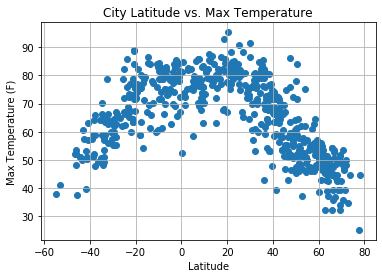

In [34]:
# Plot latitude vs temperature, saving as a .png file
plt.scatter(clean_city_data['Latitude'], clean_city_data['Temperature'])
plt.title(f'City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

plt.savefig('latitude_temperature.png', bbox_inches='tight')

Analysis: The code is comparing temperature to latitude of the randomly selected cities. The pattern indicates that the closer to the equator, the higher the maximum temperatures will be; vice-versa, the closer to the poles, the lower the maximum temperatures will be.

## Latitude vs. Humidity Plot

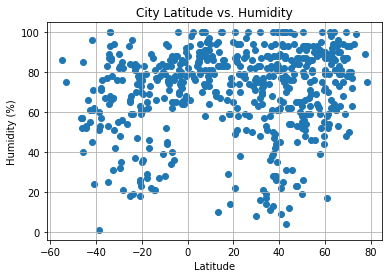

In [35]:
# Plot humidity vs latitude, saving as a .png file
plt.scatter(clean_city_data['Latitude'], clean_city_data['Humidity'])
plt.title(f'City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

plt.savefig('lat_humid.png', bbox_inches='tight')

Analysis: The code is comparing humidity and latitude of the randomly selected cities. There are drops in humidty levels where the latitude is -20 in the southern hemisphere and between 20 and 40 in the northern hemisphere. This could be the result of more cities located at those latitudes, climate differences, and/or elevation differences at those locations that will lower the humidy. 

## Latitude vs. Cloudiness Plot

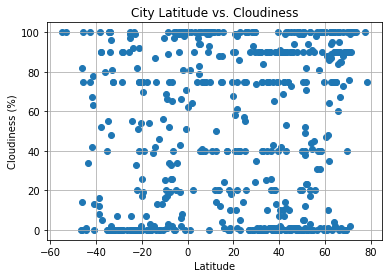

In [36]:
# Plot latitude vs cloudiness, saving as a .png file
plt.scatter(clean_city_data['Latitude'], clean_city_data['Cloudiness'])
plt.title(f'City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

plt.savefig('lat_cloud.png', bbox_inches='tight')

Analysis: The code is comparing cloudiness (as a percentage) and latitude. Of the randomly selected cities, there is no apparent pattern related to the latitude and whether the cities are cloudy. 

## Latitude vs. Wind Speed Plot

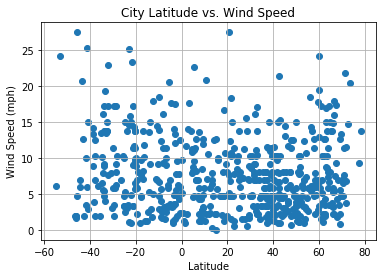

In [37]:
# Plot latitude vs wind speed, saving as a .png file
plt.scatter(clean_city_data['Latitude'], clean_city_data['Wind Speed'])
plt.title(f'City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

plt.savefig('lat_wind.png', bbox_inches='tight')

Analysis: The code compares wind speed against latitude. This data suggests that the wind speed is generally split evenly across all areas regardless of latitude with the exception of an outlier at the 75 degree northern-latitude mark. Most cities will have lower than 15 mph winds whereas the greatest concentration is below 10 mph average wind speed. 

In [18]:
northern_df = clean_city_data[clean_city_data["Latitude"] >= 0]
southern_df = clean_city_data[clean_city_data["Latitude"] <0]

The r-squared is: -0.8023042943953549


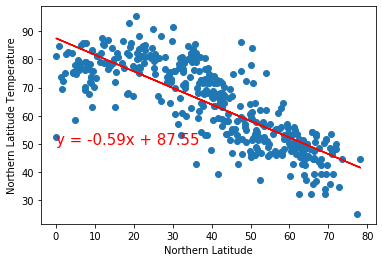

In [38]:
x_values = northern_df["Latitude"]
y_values = northern_df["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Northern Latitude Temperature')
print(f"The r-squared is: {rvalue}")
#plt.show()

plt.savefig('Northern_lat_temp.png', bbox_inches='tight')

The r-squared is: 0.7658605040503481


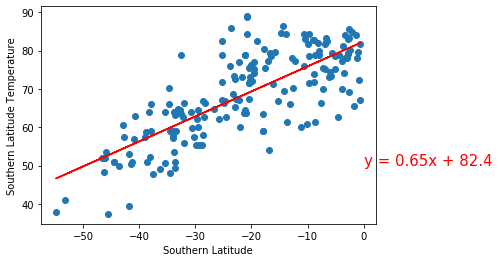

In [39]:
x_values = southern_df["Latitude"]
y_values = southern_df["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Southern Latitude Temperature')
print(f"The r-squared is: {rvalue}")
#plt.show()

plt.savefig('Southern_lat_temp.png', bbox_inches='tight')

Analysis: In segregating the data between the two hemispheres, we can see that there is a clear relationship between maximum temperature and the proximity to the equator. As we travel nearest the poles, the max temperature drops; the correlation is stronger in the Southern Hemisphere. 

The r-squared is: -0.05213892368258145


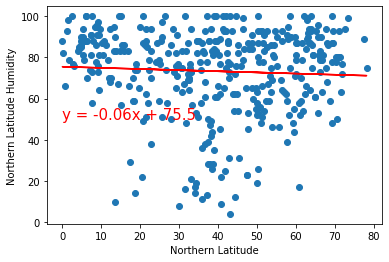

In [40]:
x_values = northern_df["Latitude"]
y_values = northern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Northern Latitude Humidity')
print(f"The r-squared is: {rvalue}")
#plt.show()

plt.savefig('Northern_lat_humidity.png', bbox_inches='tight')

The r-squared is: 0.14088433083100232


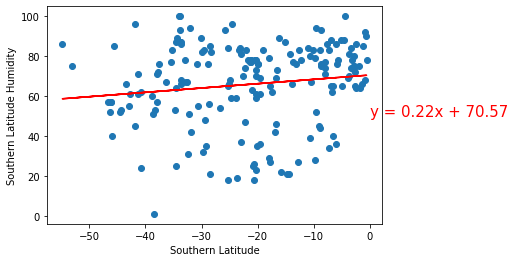

In [41]:
x_values = southern_df["Latitude"]
y_values = southern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Southern Latitude Humidity')
print(f"The r-squared is: {rvalue}")
#plt.show()

plt.savefig('Southern_lat_humidity.png', bbox_inches='tight')

The r-squared is: -0.01196903390472116


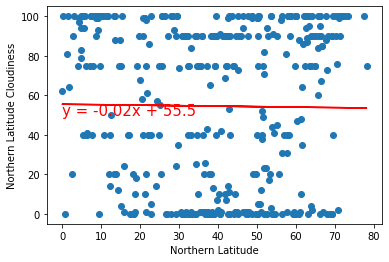

In [42]:
x_values = northern_df["Latitude"]
y_values = northern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Northern Latitude Cloudiness')
print(f"The r-squared is: {rvalue}")
#plt.show()

plt.savefig('Northern_lat_cloudiness.png', bbox_inches='tight')

The r-squared is: 0.06927671245162613


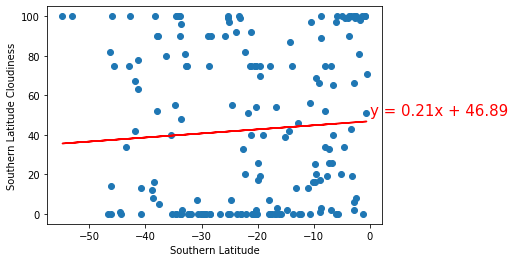

In [43]:
x_values = southern_df["Latitude"]
y_values = southern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Southern Latitude Cloudiness')
print(f"The r-squared is: {rvalue}")
#plt.show()

plt.savefig('Southern_lat_cloudiness.png', bbox_inches='tight')

Analysis: Unlike in the view of both hemispheres, when splitting the data, we can see a clearer view of how latitude affects cloudiness. Although the correlation is weak in both the northern and southern data sets, we can see that there is an effect as cloudiness drops when closer to the poles.

The r-squared is: 0.07257858221796792


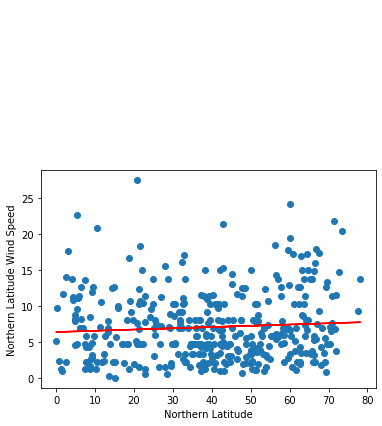

In [44]:
x_values = northern_df["Latitude"]
y_values = northern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Northern Latitude Wind Speed')
print(f"The r-squared is: {rvalue}")
#plt.show()

plt.savefig('Northern_lat_windspeed.png')


The r-squared is: -0.17805481559465333


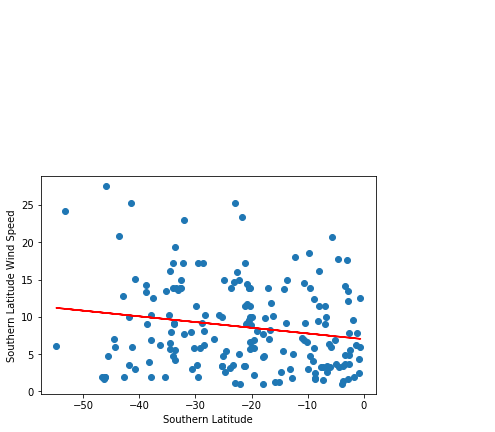

In [45]:
x_values = southern_df["Latitude"]
y_values = southern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Southern Latitude Wind Speed')
print(f"The r-squared is: {rvalue}")
#plt.show()

plt.savefig('Southern_lat_windspeed.png', bbox_inches='tight')

Analysis: The latitude has an effect on wind speed, but in a fashion different from the other data examined. In the previous views, the effect has increased generally when closer to the equator. In wind speed, however, we are seeing the opposite. Stronger in the Southern Hemisphere than in the North, the wind increases closer to the poles. 